<a href="https://colab.research.google.com/github/AnayPanja/Handwritten-Digits-Classification-using-Neural-Network/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# In this model I use mnist dataset from keras library..

In [88]:
import tensorflow as tf
from tensorflow import  keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [89]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [90]:
print(len(x_train))
print(len(x_test))
print(x_train[1].shape)

60000
10000
(28, 28)


In [91]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [92]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

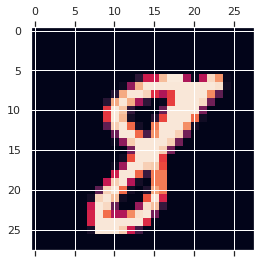

In [93]:
plt.matshow(x_train[55])

In [94]:
x_train.shape

(60000, 28, 28)

In [95]:
x_train_scaled =  x_train/255
x_test_scaled = x_test/255

In [96]:
#flatten the image matrix
x_train_flatten = x_train_scaled.reshape(len(x_train),28*28)
x_test_flatten = x_test_scaled.reshape(len(x_test),28*28)


In [97]:
x_train_flatten.shape

(60000, 784)

In [98]:
model = keras.Sequential([
              keras.layers.Dense(120,input_shape=(784,),activation='relu'),
              keras.layers.Dense(10,activation='sigmoid')
])

In [99]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
)

In [100]:
model.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2610 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0818 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0627 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [101]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0839 - accuracy: 0.9753


[0.08386388421058655, 0.9753000140190125]

In [102]:
y_predicted = model.predict(x_test_flatten)

9

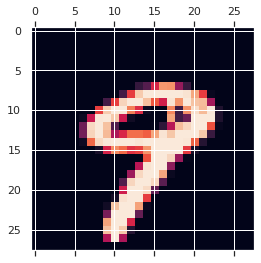

In [103]:
# Testing this model

plt.matshow(x_test[9])
y_predicted[9]
np.argmax(y_predicted[9])

In [104]:
y_predicted_final = [np.argmax(i) for i in y_predicted]

In [105]:
print("Given data    =   ",list(y_test[:15]))
print("Model prediction =",y_predicted_final[:15])

Given data    =    [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]
Model prediction = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]


In [106]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_final)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    1,    0,    1,    1,    4,    2,    4,    0],
       [   0, 1127,    3,    0,    0,    0,    0,    1,    4,    0],
       [   4,    1, 1006,    0,    2,    0,    2,    6,   11,    0],
       [   0,    1,    5,  976,    0,    4,    0,    5,   18,    1],
       [   0,    0,    7,    0,  953,    0,    5,    3,    2,   12],
       [   2,    0,    1,    8,    1,  864,    5,    1,    8,    2],
       [   2,    4,    2,    0,    5,    6,  932,    1,    5,    1],
       [   0,    2,    7,    4,    1,    0,    0, 1001,   10,    3],
       [   3,    0,    4,    0,    0,    1,    1,    2,  962,    1],
       [   0,    3,    1,    0,    8,    5,    0,    7,   19,  966]],
      dtype=int32)>

Text(93.5, 0.5, 'Given data')

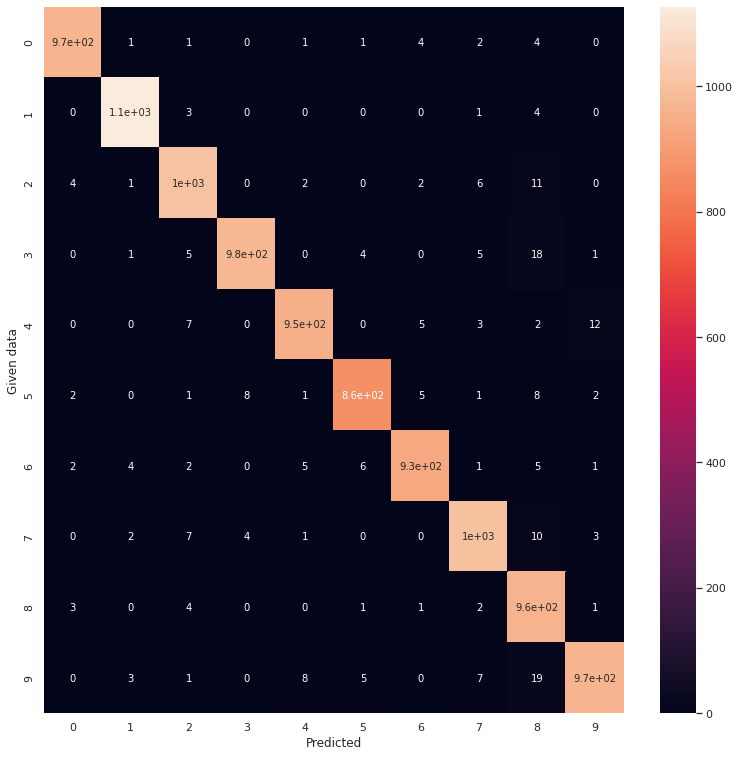

In [107]:
import seaborn as sns 
plt.figure(figsize=(13,13))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Given data')